In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import re
import warnings
from pprint import pprint
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix


# Import training and scoring data
train = pd.read_csv("2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv")
score = pd.read_csv("2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv")

In [2]:
# train.head()

In [3]:
# score.head()

In [4]:
# Check the distribution of target variable
train.zeta_disease.value_counts()

0    521
1    279
Name: zeta_disease, dtype: int64

In [5]:
print("No disease: ", round(521/800,2))
print("Zeta disease: ", round(279/800,2))

No disease:  0.65
Zeta disease:  0.35


In [6]:
# Descriptive analysis
train.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [7]:
# Check for missing values
score.isna().sum()

age                    0
weight                 0
bmi                    0
blood_pressure         0
insulin_test           0
liver_stress_test      0
cardio_stress_test     0
years_smoking          0
zeta_disease          20
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F39DE27C0>,
      dtype=object)

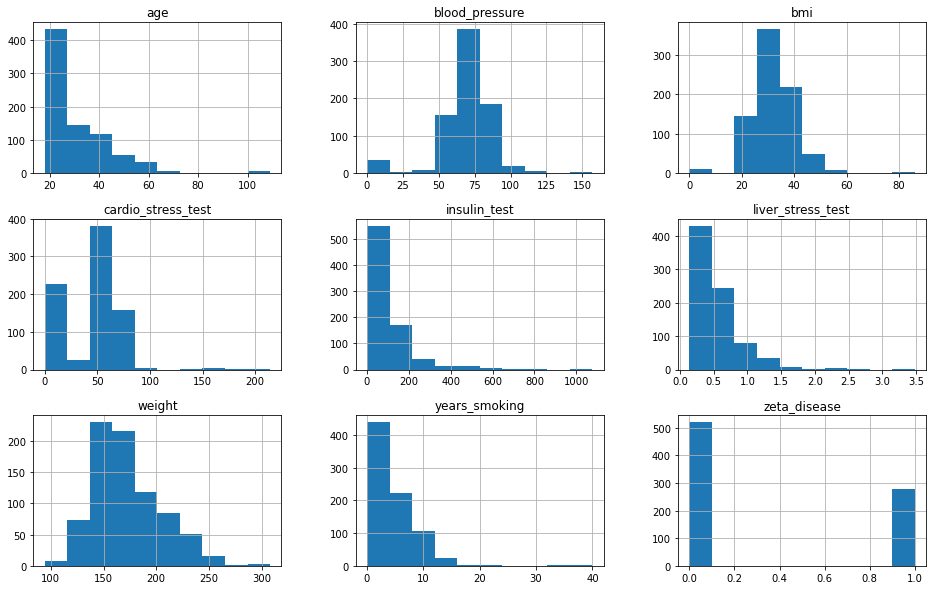

In [8]:
# Distribution plots of training data
train.hist(figsize=(16,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F3C54DD00>,
      dtype=object)

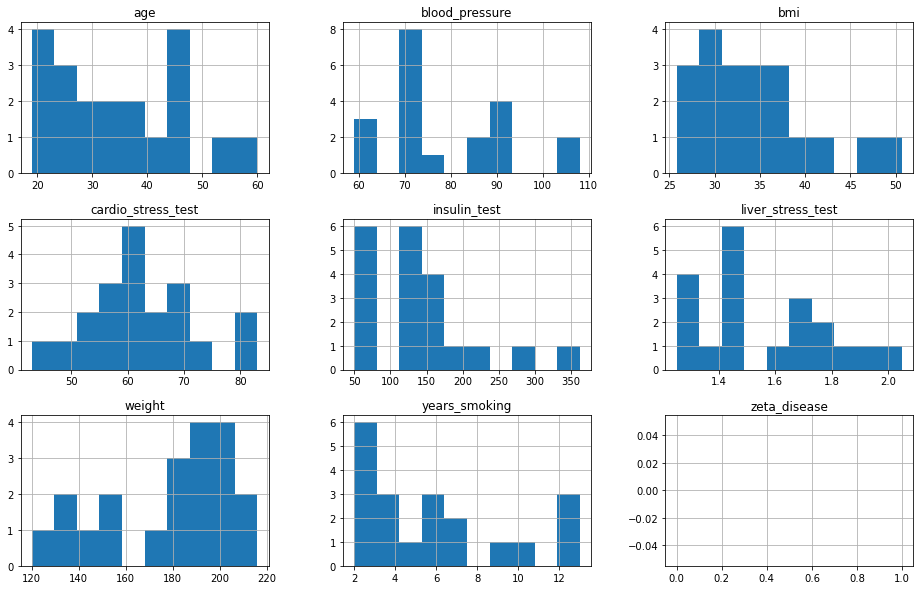

In [9]:
# Distribution plots of scoring data
score.hist(figsize=(16,10))

In [10]:
# Check for outliers and remove the records with outliers
import numpy as np
from scipy import stats
train_cleaned = train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F3C956E80>,
      dtype=object)

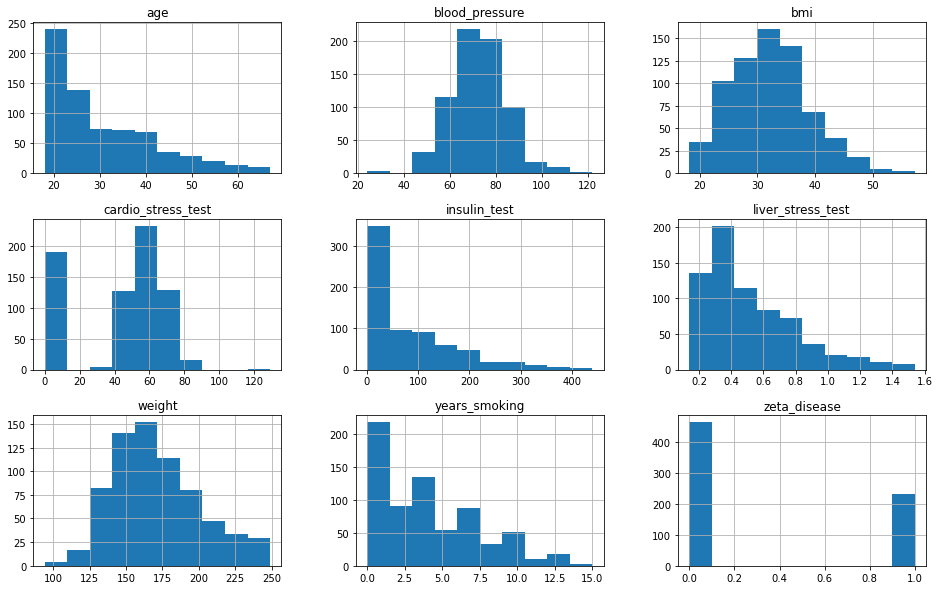

In [11]:
# Distribution plots of cleaned training data
train_cleaned.hist(figsize=(16,10))

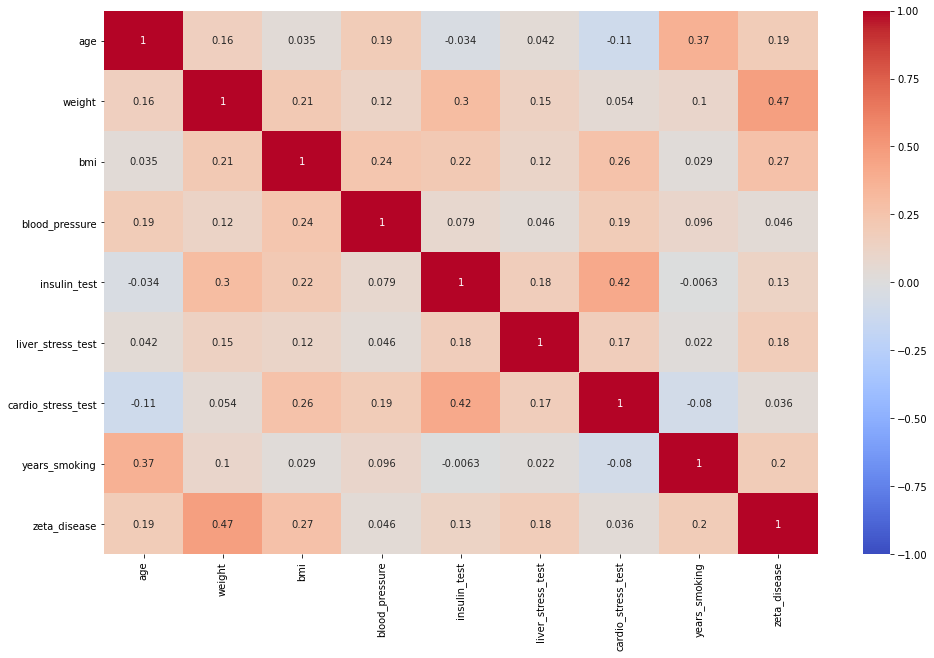

In [12]:
# Correlations
fig, ax = pyplot.subplots(figsize=(16,10))
sns.heatmap(train.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax)

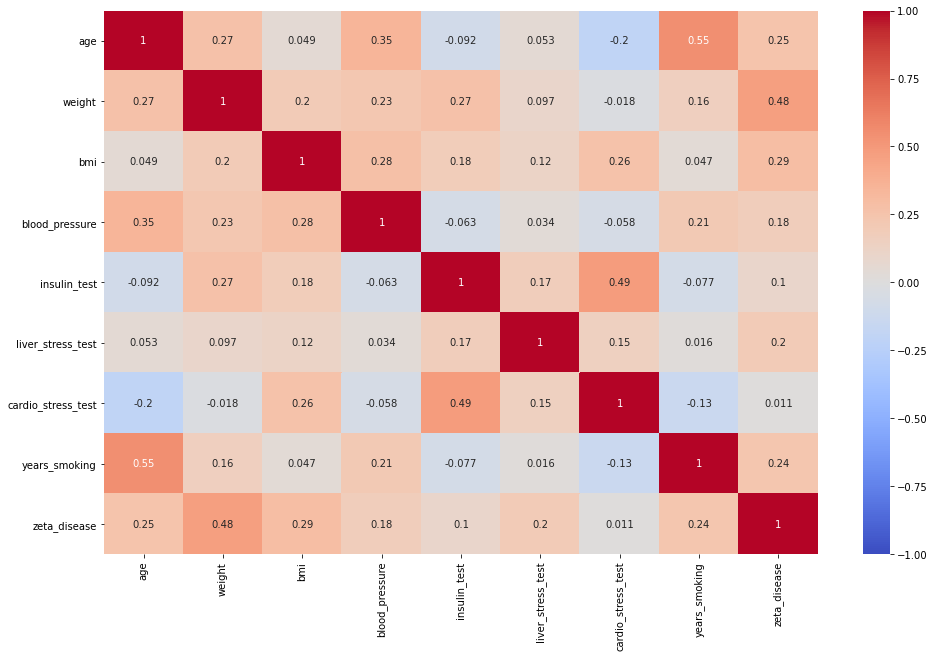

In [13]:
# Correlations on cleaned data
fig, ax = pyplot.subplots(figsize=(16,10))
sns.heatmap(train_cleaned.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax)

In [79]:
# Functions to predict and plot confusion matrix and metrics

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [0,1]
    print("-"*20, "Confusion Matrix", "-"*20)
    plt.figure(figsize=(10,3))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print(classification_report(test_y, predict_y))

def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
#     sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
#     sig_clf.fit(train_x, train_y)
#     pred_y = sig_clf.predict(test_x)
    pred_y = clf.predict(test_x)
#     print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    print("Log loss :",log_loss(test_y, clf.predict_proba(test_x)))
    print("Percentage of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [17]:
## FULL DATA
# X = train.iloc[:, :-1]
# y = train.iloc[:, -1]

## FULL DATE WITH SELECTED FEATURES
# X = train[['age', 'weight', 'bmi', 'liver_stress_test']]
# y = train.iloc[:, -1]

## FILTERED DATA
# X = train_cleaned.iloc[:, :-1]
# y = train_cleaned.iloc[:, -1]

## FILTERED DATA WITH SELECTED FEATURES
# X = train_cleaned[['age', 'weight', 'bmi', 'liver_stress_test']]
# y = train_cleaned.iloc[:, -1]

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1,random_state=42)

In [18]:
# !pip install --user lazypredict

In [19]:
# import sys
# sys.path.append("C:/Users/tmuralidhar/AppDataRoaming/Python/Python38/Scripts")

In [20]:
## LAZYPREDICT on all data

# X = train.iloc[:, :-1]
# y = train.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1,random_state=42)

# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# print(models)

In [44]:
### USE THIS TRAINING DATA ###
## LAZYPREDICT on all data with selected features

# X = train[['age', 'weight', 'bmi', 'liver_stress_test']]
# y = train.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1,random_state=42)

# from lazypredict.Supervised import LazyClassifier
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# print(models)

In [25]:
## LAZYPREDICT on filtered data (outliers removed)

# X = train_cleaned.iloc[:, :-1]
# y = train_cleaned.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1,random_state=42)

# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# print(models)

In [45]:
## LAZYPREDICT on filtered data with selected features

# X = train_cleaned[['age', 'weight', 'bmi', 'liver_stress_test']]
# y = train_cleaned.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1,random_state=42)

# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# print(models)

In [87]:
## Using the selected features on all data for training and predictions
X = train[['age', 'weight', 'bmi', 'liver_stress_test']]
y = train.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1,random_state=42)

Log loss : 0.4454230945832636
Percentage of mis-classified points : 0.175
-------------------- Confusion Matrix --------------------


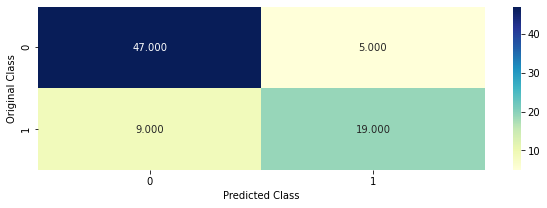

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        52
           1       0.79      0.68      0.73        28

    accuracy                           0.82        80
   macro avg       0.82      0.79      0.80        80
weighted avg       0.82      0.82      0.82        80



In [88]:
## Checking the results of RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
tuned_parameters = [10,50,100,200,300,400,500,1000,2000]
cv_log_error_array = []
for i in tuned_parameters:
#     print("for alpha =", i)
    clf = RandomForestClassifier(n_estimators=i, bootstrap = True)
    clf.fit(X_train, y_train)
    sig_clf_probs_test = clf.predict_proba(X_test)
    sig_clf_probs_train = clf.predict_proba(X_train)
    cv_log_error_array.append(log_loss(y_test, sig_clf_probs_test, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
#     print("Log Loss test %s. Log loss train %s " %(log_loss(y_test, sig_clf_probs_test),log_loss(y_train, sig_clf_probs_train))) 
best_alpha = np.argmin(cv_log_error_array)
# print('Best alpha : ' ,tuned_parameters[best_alpha])
clf = RandomForestClassifier(n_estimators=tuned_parameters[best_alpha], bootstrap = True)
from sklearn.metrics import classification_report
predict_and_plot_confusion_matrix(X_train, y_train, X_test, y_test, clf)

Best alpha :  10
Log loss : 1.6673604788209677
Percentage of mis-classified points : 0.2
-------------------- Confusion Matrix --------------------


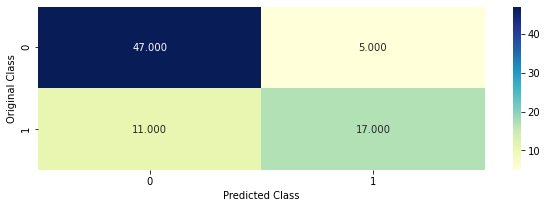

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        52
           1       0.77      0.61      0.68        28

    accuracy                           0.80        80
   macro avg       0.79      0.76      0.77        80
weighted avg       0.80      0.80      0.79        80



In [89]:
## Checking the results of ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
tuned_parameters = [10,50,100,200,300,400,500,1000,2000]
cv_log_error_array = []
for i in tuned_parameters:
#     print("for alpha =", i)
    clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
    clf.fit(X_train, y_train)
    sig_clf_probs_test = clf.predict_proba(X_test)
    sig_clf_probs_train = clf.predict_proba(X_train)
    cv_log_error_array.append(log_loss(y_test, sig_clf_probs_test, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
#     print("Log Loss test %s. Log loss train %s " %(log_loss(y_test, sig_clf_probs_test),log_loss(y_train, sig_clf_probs_train))) 
best_alpha = np.argmin(cv_log_error_array)
print('Best alpha : ' ,tuned_parameters[best_alpha])
clf = ExtraTreesClassifier(n_estimators=tuned_parameters[best_alpha], random_state=0)
from sklearn.metrics import classification_report
predict_and_plot_confusion_matrix(X_train, y_train, X_test, y_test, clf)

Log loss : 0.6327679790874897
Percentage of mis-classified points : 0.15
-------------------- Confusion Matrix --------------------


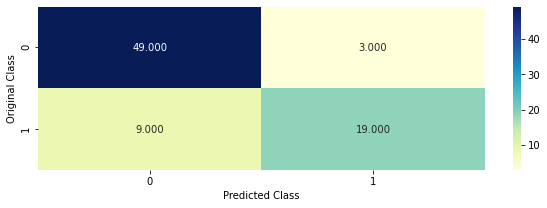

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        52
           1       0.86      0.68      0.76        28

    accuracy                           0.85        80
   macro avg       0.85      0.81      0.83        80
weighted avg       0.85      0.85      0.85        80



In [90]:
## Checking the results of AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tuned_parameters = [10,50,100,200,300,400,500,1000,2000]
cv_log_error_array = []
for i in tuned_parameters:
#     print("for alpha =", i)
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=i)
    clf.fit(X_train, y_train)
    sig_clf_probs_test = clf.predict_proba(X_test)
    sig_clf_probs_train = clf.predict_proba(X_train)
    cv_log_error_array.append(log_loss(y_test, sig_clf_probs_test, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
#     print("Log Loss test %s. Log loss train %s " %(log_loss(y_test, sig_clf_probs_test),log_loss(y_train, sig_clf_probs_train))) 
best_alpha = np.argmin(cv_log_error_array)
# print('Best alpha : ' ,tuned_parameters[best_alpha])
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=tuned_parameters[best_alpha])
from sklearn.metrics import classification_report
predict_and_plot_confusion_matrix(X_train, y_train, X_test, y_test, clf)

Log loss : 0.47143448834540325
Percentage of mis-classified points : 0.175
-------------------- Confusion Matrix --------------------


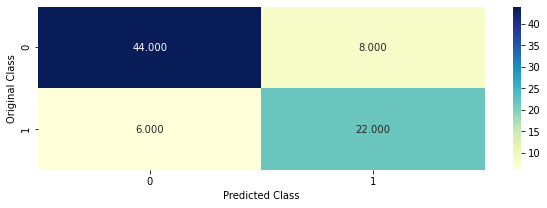

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        52
           1       0.73      0.79      0.76        28

    accuracy                           0.82        80
   macro avg       0.81      0.82      0.81        80
weighted avg       0.83      0.82      0.83        80



In [91]:
## Checking the results of XGBClassifier
from xgboost import XGBClassifier
tuned_parameters = [10,50,100,200,300,400,500,1000,2000]
cv_log_error_array = []
for i in tuned_parameters:
#     print("for alpha =", i)
    clf = XGBClassifier(learning_rate =0.1, n_estimators=i, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
    clf.fit(X_train, y_train)
    sig_clf_probs_test = clf.predict_proba(X_test)
    sig_clf_probs_train = clf.predict_proba(X_train)
    cv_log_error_array.append(log_loss(y_test, sig_clf_probs_test, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
#     print("Log Loss test %s. Log loss train %s " %(log_loss(y_test, sig_clf_probs_test),log_loss(y_train, sig_clf_probs_train))) 
best_alpha = np.argmin(cv_log_error_array)
# print('Best alpha : ' ,tuned_parameters[best_alpha])
clf = XGBClassifier(learning_rate =0.1, n_estimators=tuned_parameters[best_alpha], max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
from sklearn.metrics import classification_report
predict_and_plot_confusion_matrix(X_train, y_train, X_test, y_test, clf)

In [107]:
## Using AdaBoostClassifier for training and scoring
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=10)
clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=10)

In [108]:
score.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.50,69,72,1.40,56,4,nan
1,27,179,35.50,89,156,1.66,43,6,nan
2,34,147,26.90,76,74,1.70,53,2,nan
3,35,206,32.40,73,127,1.46,61,6,nan
4,60,193,29.80,62,192,1.78,65,9,nan


In [109]:
## Selected columns from Scoring data for predictions
score_new = score[['age', 'weight', 'bmi', 'liver_stress_test']]

In [119]:
## Predicted probabilities
pred = clf.predict_proba(score_new)
prob = []
prob = pred[:,1]

In [127]:
## Predicted classes
pred_class = [round(num) for num in prob]
pred_class

In [134]:
## Save the results to CSV
score_2 = score.copy()
score_2['zeta_disease'] = pred_class
score_2.to_csv("2021-02-20_zeta-disease_prediction-data_dsi-take-home-challenge.csv", index=False)